### ESERCIZIO FINE MODULO PYTHON <Samuel_Magnin>

#### QUEST-1:
Verifica le `dimensioni` del `dataset` <br>
e le `scritte` presenti alla'`intestazione`

In [2]:
#Importare la libreria pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt
#Assegnare la variabile path all'url di riferimento
path = r"https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true"
#Lettura file tramite pd.read_csv
covid = pd.read_csv(path, low_memory=False)
#Creazione specchietto illustrativo
print(f"Il DataSet e' composto da \033[0;33m{covid.shape[0]}\033[0m \033[0;32mrighe\033[0m \ne \033[0;33m{covid.shape[1]}\033[0m \033[0;32mcolonne\033[0m per un totale di \033[0;33m{covid.size}\033[0m \033[0;32melementi\033[0m ")
nome_colonna = covid.columns
print("Le Colonne sono:")
for numero, nome in enumerate(nome_colonna):
    print(f"{numero}) {nome}")

Il DataSet e' composto da 377047 righe 
e 67 colonne per un totale di 25262149 elementi 
Le Colonne sono:
0) iso_code
1) continent
2) location
3) date
4) total_cases
5) new_cases
6) new_cases_smoothed
7) total_deaths
8) new_deaths
9) new_deaths_smoothed
10) total_cases_per_million
11) new_cases_per_million
12) new_cases_smoothed_per_million
13) total_deaths_per_million
14) new_deaths_per_million
15) new_deaths_smoothed_per_million
16) reproduction_rate
17) icu_patients
18) icu_patients_per_million
19) hosp_patients
20) hosp_patients_per_million
21) weekly_icu_admissions
22) weekly_icu_admissions_per_million
23) weekly_hosp_admissions
24) weekly_hosp_admissions_per_million
25) total_tests
26) new_tests
27) total_tests_per_thousand
28) new_tests_per_thousand
29) new_tests_smoothed
30) new_tests_smoothed_per_thousand
31) positive_rate
32) tests_per_case
33) tests_units
34) total_vaccinations
35) people_vaccinated
36) people_fully_vaccinated
37) total_boosters
38) new_vaccinations
39) new_

#### QUEST-2:
Trova il `numero di casi totali` avvenuti per `continente`; <br>
Non considerare locazioni senza continente associato.

Filtro Valori Nulli e Pulizia DataFrame

In [3]:
filtro = covid["continent"].isnull()
indici_da_eliminare = covid.loc[filtro].index
covid = covid.drop(indici_da_eliminare)
covid.reset_index(drop=True)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358963,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358964,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358965,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358966,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Visualizzazione `numero di casi totali` avvenuti per `continente`

In [4]:
casi_totali_per_continente = covid.groupby('continent')['new_cases'].sum()
casi_totali_per_continente

continent
Africa            13136517.0
Asia             301391174.0
Europe           252013370.0
North America    124526003.0
Oceania           14741735.0
South America     68752780.0
Name: new_cases, dtype: float64

#### QUEST-3:
Riguardo ai `casi totali` per continente: <br>

Sviluppare una funzione che prenda in input il dataset e due nomi di continenti <br>
e che ne confronti i seguenti relativi descrittori statistici:
- valore minimo
- valore massimo
- valore media
- valore percentuale rispetto al "totale mondiale di casi" <br>

Il valore "totale mondiale di casi" si basera' anche sulle locazioni senza continente.


In [5]:
##Ridefinizione covid per contare anche localita' con Continente NaN
covid = pd.read_csv(path,low_memory=False)

In [6]:
###Definizione Funzione
def report_cases(data_frame, selected_continents, visual_mode):
    #DocString
    '''
    Questa funzione accetta 3 parametri:
    data_frame > tipo di dato [pandas.core.frame.DataFrame]
    selected_continents > una stringa o una lista di n stringhe (le colonne del dataframe)
    visual_mode > il metodo di visualizzazione desiderato ("Text" o "Chart")
    '''



    ##Blocco Variabili Necessarie
    #Assegnazione tipo di dato [pandas.core.frame.DataFrame] a "dataframe"
    data_frame = pd.DataFrame(data_frame)
    
    #Creazione ndarray contenente nomi dei continenti
    continents = data_frame.continent.unique()
    
    #Assegnazione tipo di dato [pandas.core.series.Series] a "continents"
    continents = pd.Series(continents)
    

    
    ##Blocco Variabili Grafico
    dict_x = {}
    list_continent_x = []
    list_max_x = []
    list_min_x = []
    list_avg_x = []



    ##Blocco Funzione
    #Iterazione "continent_x" nella lista fornita "selected_continents" 
    #(estrazione singolo elemento)
    for continent_x in selected_continents:

        #Identificazione posizione "continent_x" nella Series "continents"
        index = (continents == continent_x).idxmax()

        #Selezione valore "continent_y" in "Series" in base alla posizione ricavata precedentemente
        continent_y = continents.unique()[index]
        
        #Riempimento Variabile Grafico
        list_continent_x.append(continent_y)



        ##Blocco Calcolo
        #Massimo Casi
        max_cases = data_frame.groupby("continent")["new_cases"].sum()
        
        #Minimo Casi
        min_cases = data_frame.groupby("continent")["total_cases"].min()
        
        #Media Casi
        avg_cases = data_frame.groupby("continent")["total_cases"].mean()
        
        #Media Casi al giorno
        avg_day_cases = data_frame.groupby("continent")["new_cases"].mean()
        
        #Totale e Percentuale Casi
        total_cases = int(sum(max_cases))
        percent_cases = (max_cases[continent_y] / total_cases) * 100
        
        #Riempimento Variabili Grafico
        list_max_x.append(int(max_cases.loc[continent_y]))
        list_min_x.append(int(min_cases.loc[continent_y]))
        list_avg_x.append(int(avg_cases.loc[continent_y]))



        ##Blocco Stampa Report Testuale
        if visual_mode == "Text":
            print(f"                              <{continent_y}>")
            print(f"Il continente {continent_y} ha:")
            print(f"1) Numero di casi massimi:    {int(max_cases.loc[continent_y]):,}".replace(",", "."))
            print(f"2) Numero di casi minimi:     {int(min_cases.loc[continent_y]):,}".replace(",", "."))
            print(f"3) Numero di casi medi:       {int(avg_cases.loc[continent_y]):,}".replace(",", "."))
            print(f"3+                            {int(avg_day_cases.loc[continent_y]):,}/giorno".replace(",", "."))
            print(f"4) In relazione al totale:    {round(percent_cases, 2):,}% \n".replace(",", "."))
    if visual_mode == "Text":
        print(f"- Numero totale di casi:      {total_cases} \n")



    ##Blocco Stampa Report Grafico
    if visual_mode == "Chart":
        dict_x[''] = list_continent_x
        dict_x['Massimo'] = list_max_x
        dict_x['Minimo'] = list_min_x
        dict_x['Media'] = list_avg_x
        chart = pd.DataFrame(dict_x)
        chart = chart.set_index('')
        plot_1 = chart.plot(kind='bar', stacked=False, figsize=(10, 6))
        plt.title("Report_Cases")
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.show()
    print("https://ourworldindata.org/explorers/coronavirus-data-explorer?tab=table&zoomToSelection=true&facet=none&showSelectionOnlyInTable=1&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=Cumulative&Relative+to+Population=false&Color+by+test+positivity=false&country=OWID_AFR~OWID_NAM~OWID_SAM~OWID_EUR~OWID_ASI~OWID_OCE")
    print("#Dati Congrui \n")

In [7]:

###Prova su valori desiderati
report_cases(covid,['Africa','Asia'],'Text')

                              <Africa>
Il continente Africa ha:
1) Numero di casi massimi:    13.136.517
2) Numero di casi minimi:     1
3) Numero di casi medi:       153.124
3+                            154/giorno
4) In relazione al totale:    1.7% 

                              <Asia>
Il continente Asia ha:
1) Numero di casi massimi:    301.391.174
2) Numero di casi minimi:     1
3) Numero di casi medi:       3.079.394
3+                            4.298/giorno
4) In relazione al totale:    38.91% 

- Numero totale di casi:      774561579 

https://ourworldindata.org/explorers/coronavirus-data-explorer?tab=table&zoomToSelection=true&facet=none&showSelectionOnlyInTable=1&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=Cumulative&Relative+to+Population=false&Color+by+test+positivity=false&country=OWID_AFR~OWID_NAM~OWID_SAM~OWID_EUR~OWID_ASI~OWID_OCE
#Dati Congrui 



#### QUEST-4:
Riguardo alle `vaccinazioni totali` per continente: <br>

Sviluppare una funzione che prenda in input il dataset e due nomi di continenti <br>
e che ne confronti i seguenti relativi descrittori statistici:
- valore minimo
- valore massimo
- valore media
- valore percentuale rispetto al "totale mondiale di vaccinazioni" <br>

Il valore "totale mondiale di vaccinazioni" si basera' anche sulle locazioni senza continente.

In [14]:
###Definizione Funzione
def report_vaccinations(data_frame, selected_continents, visual_mode):
    #DocString
    '''
    Questa funzione accetta 3 parametri:
    data_frame > tipo di dato [pandas.core.frame.DataFrame]
    selected_continents > una stringa o una lista di n stringhe (le colonne del dataframe)
    visual_mode > il metodo di visualizzazione desiderato ("Text" o "Chart")
    '''



    ##Blocco Variabili Necessarie
    #Assegnazione tipo di dato [pandas.core.frame.DataFrame] a "dataframe"
    data_frame = pd.DataFrame(data_frame)

    #Creazione ndarray contenente nomi dei continenti
    continents = data_frame.continent.unique()

    #Assegnazione tipo di dato [pandas.core.series.Series] a "continents"
    continents = pd.Series(continents)


    
    ##Blocco Variabili Grafico
    dict_x = {}
    list_continent_x = []
    list_max_x = []
    list_min_x = []
    list_avg_x = []

    ##Blocco Funzione
    #Iterazione "continent_x" nella lista fornita "selected_continents" 
    #(estrazione singolo elemento)
    for continent_x in selected_continents:

        #Identificazione posizione "continent_x" nella Series "continents"
        index = (continents == continent_x).idxmax()

        #Selezione valore "continent_y" in "Series" in base alla posizione ricavata precedentemente
        continent_y = continents.unique()[index]

        #Riempimento Variabile Grafico
        list_continent_x.append(continent_y)



        ##Blocco Calcolo
        #Massimo Vaccinazioni
        max_vaccination = data_frame.groupby("continent")["total_vaccinations"].max()

        #Minimo Vaccinazioni
        min_vaccination = data_frame.groupby("continent")["total_vaccinations"].min()

        #Media Vaccinazioni
        avg_vaccination = data_frame.groupby("continent")["total_vaccinations"].mean()

        #Media Vaccinazioni al giorno
        avg_day_vaccination = data_frame.groupby("continent")["new_vaccinations"].mean()

        #Totale e Percentuale Casi
        total_vaccination = int(sum(max_vaccination))
        percent_vaccination = (max_vaccination[continent_y] / total_vaccination) * 100

        #Riempimento Variabili Grafico
        list_max_x.append(int(max_vaccination.loc[continent_y]))
        list_min_x.append(int(min_vaccination.loc[continent_y]))
        list_avg_x.append(int(avg_vaccination.loc[continent_y]))



        ##Blocco Stampa Report Testuale
        if visual_mode == "Text":
            print(f"                               <{continent_y}>")
            print(f"Il continente {continent_y} ha:")
            print(f"1) Numero di vacc. massime:    {int(max_vaccination.loc[continent_y]):,}".replace(",", "."))
            print(f"2) Numero di vacc. minime:     {int(min_vaccination.loc[continent_y]):,}".replace(",", "."))
            print(f"3) Numero di vacc. medie:      {int(avg_vaccination.loc[continent_y]):,}".replace(",", "."))
            print(f"3+                             {int(avg_day_vaccination.loc[continent_y]):,}/giorno".replace(",", "."))
            print(f"4) In relazione al totale:     {round(percent_vaccination, 2):,}% \n".replace(",", "."))
    if visual_mode == "Text":
        print(f"- Numero totale di casi:      {total_vaccination} \n")
    


    ##Blocco Stampa Report Grafico
    if visual_mode == "Chart":
        dict_x[''] = list_continent_x
        dict_x['Massimo'] = list_max_x
        dict_x['Minimo'] = list_min_x
        dict_x['Media'] = list_avg_x
        chart = pd.DataFrame(dict_x)
        chart = chart.set_index('')
        plot_1 = chart.plot(kind='bar', stacked=False, figsize=(10, 6))
        plt.title("Report_Vaccinations")
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.show()
    
    print("https://ourworldindata.org/explorers/coronavirus-data-explorer?tab=table&zoomToSelection=true&facet=none&uniformYAxis=0&showSelectionOnlyInTable=1&country=OWID_AFR~OWID_NAM~OWID_SAM~OWID_EUR~OWID_ASI~OWID_OCE&pickerSort=asc&pickerMetric=location&Metric=People+vaccinated&Interval=Cumulative&Relative+to+Population=false&Color+by+test+positivity=false")
    print("#Dati 'leggermente' Incongrui, ma con stesso andamento \n")

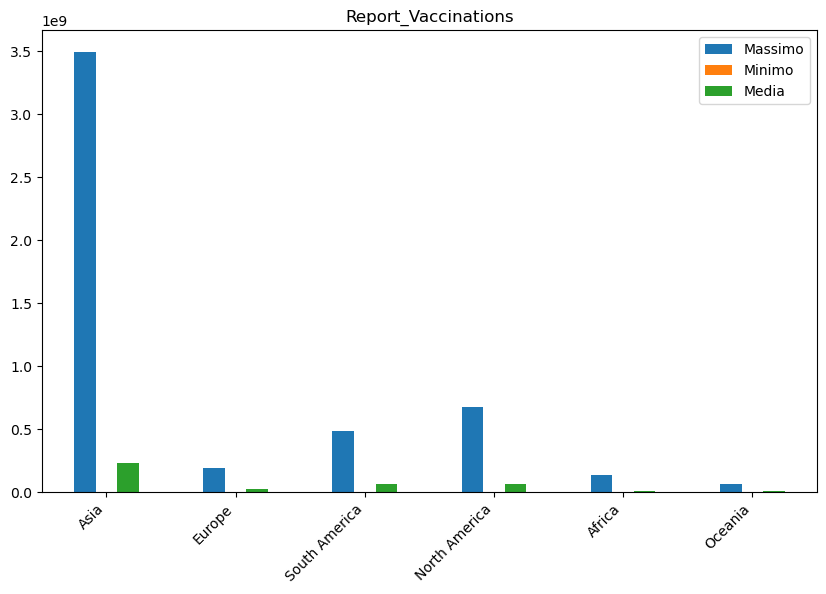

https://ourworldindata.org/explorers/coronavirus-data-explorer?tab=table&zoomToSelection=true&facet=none&uniformYAxis=0&showSelectionOnlyInTable=1&country=OWID_AFR~OWID_NAM~OWID_SAM~OWID_EUR~OWID_ASI~OWID_OCE&pickerSort=asc&pickerMetric=location&Metric=People+vaccinated&Interval=Cumulative&Relative+to+Population=false&Color+by+test+positivity=false
#Dati 'leggermente' Incongrui, ma con stesso andamento 



In [15]:
###Prova su valori desiderati
report_vaccinations(covid,['Asia', 'Europe','South America','North America','Africa','Oceania'],'Chart')

#### QUEST-5:
Stilare un breve (tre o quattro righe) `paragrafo testuale` riassuntivo sulle statistiche di casi e vaccinazioni, <br>
che si concentri solo sulle differenze esistenti tra Europa, Sud America e Oceania.

Ottenimento valori

In [12]:
###Definizione Funzione
def report(data_frame, selected_continents, visual_mode):
      #DocString
    '''
    Questa funzione accetta 3 parametri:
    data_frame > tipo di dato [pandas.core.frame.DataFrame]
    selected_continents > una stringa o una lista di n stringhe (le colonne del dataframe)
    visual_mode > il metodo di visualizzazione desiderato ("Text" o "Chart")
    '''


    #Funzione per i Casi
    res1 = report_cases(data_frame, selected_continents, visual_mode)



    #Funzione per le Vaccinazioni
    res2 = report_vaccinations(data_frame, selected_continents, visual_mode)

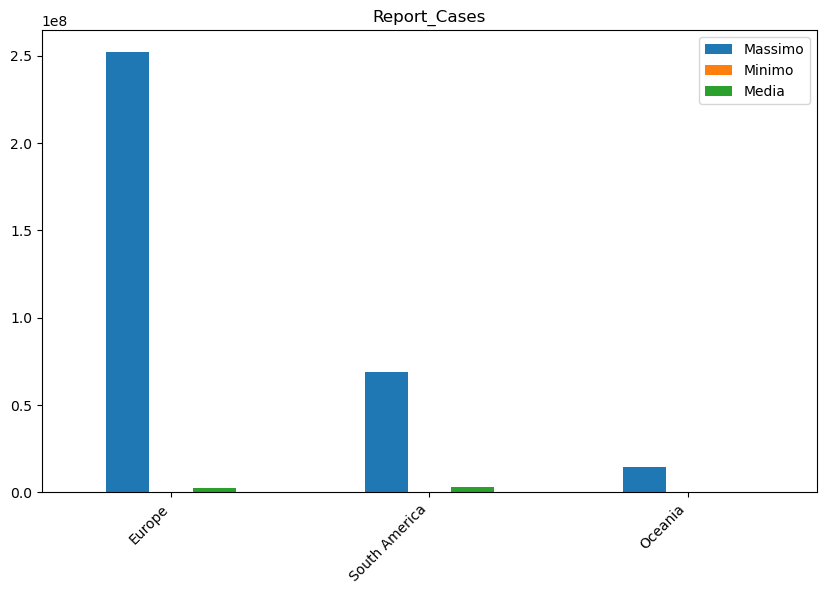

https://ourworldindata.org/explorers/coronavirus-data-explorer?tab=table&zoomToSelection=true&facet=none&showSelectionOnlyInTable=1&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=Cumulative&Relative+to+Population=false&Color+by+test+positivity=false&country=OWID_AFR~OWID_NAM~OWID_SAM~OWID_EUR~OWID_ASI~OWID_OCE
#Dati Congrui 



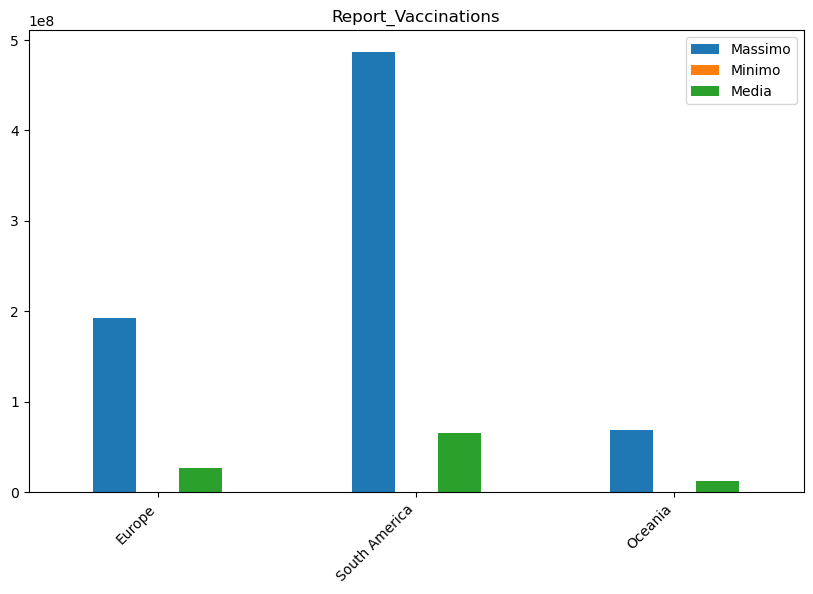

https://ourworldindata.org/explorers/coronavirus-data-explorer?tab=table&zoomToSelection=true&facet=none&uniformYAxis=0&showSelectionOnlyInTable=1&country=OWID_AFR~OWID_NAM~OWID_SAM~OWID_EUR~OWID_ASI~OWID_OCE&pickerSort=asc&pickerMetric=location&Metric=People+vaccinated&Interval=Cumulative&Relative+to+Population=false&Color+by+test+positivity=false
#Dati 'leggermente' Incongrui, ma con stesso andamento 



In [16]:
report(covid, ['Europe', 'South America', 'Oceania'],'Chart')

`Paragrafo`: <br>

Durante lo svolgimento dell'osservazione globale sul covid (da 2020-01-05 ad oggi) <br>
1 > L'Oceania ha registrato il minor numero di casi totali<br>
2 > L'America del Sud ha registrato il maggior numero di vaccinazioni totali<br>
3 > L'Europa ha registrato il maggior numero di casi totali<br>